<a href="https://colab.research.google.com/github/Romanchenko-RS/ML/blob/main/%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%2C_%D0%BF%D0%B5%D1%80%D0%B5%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5%2C_%D1%80%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%A0%D0%BE%D0%BC%D0%B0%D0%BD%D1%87%D0%B5%D0%BD%D0%BA%D0%BE_%D0%A0_%D0%A1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Преобразование данных**

**a. Проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [ ]:
# Импорт данных
data = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [ ]:
# Получим информацию о пропусках данных
print(data.isna().sum())

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64


Замечаем, что в данных есть пропуски. Используем самый простой способ обработки данных - удаление пустых значений.

In [ ]:
data = data.dropna()
# Проверяем отсутствие пропусков
print(data.isna().sum())

id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64


**b. Закодируйте категориальные переменные числовыми значениями по необходимости.**

In [ ]:
new_data = data[['height', 'weight', 'sport', 'sex']]  # В анализ возьмём рост, вес и вид спорта. Будем разделять спортсенов по полу
X = pd.get_dummies(new_data, columns=['sport'], dtype=int)
del X['sex']  # убираем целевое значение из датасета

In [ ]:
le = LabelEncoder()  # последовательно кодирует значения
le.fit(data['sex'])
y = pd.Series(data=le.transform(data['sex']))

**2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.**

In [ ]:
# обучаем на части датасета (train)
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Разделяем выборку

In [ ]:
# Обучение
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model.predict(X_test)  # получаем массив
print(f'Train score: {model.score(X_train, y_train):.4f}')
print(f'Test score: {model.score(X_test, y_test):.4f}')

Train score: 0.8153
Test score: 0.8103


**3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.**

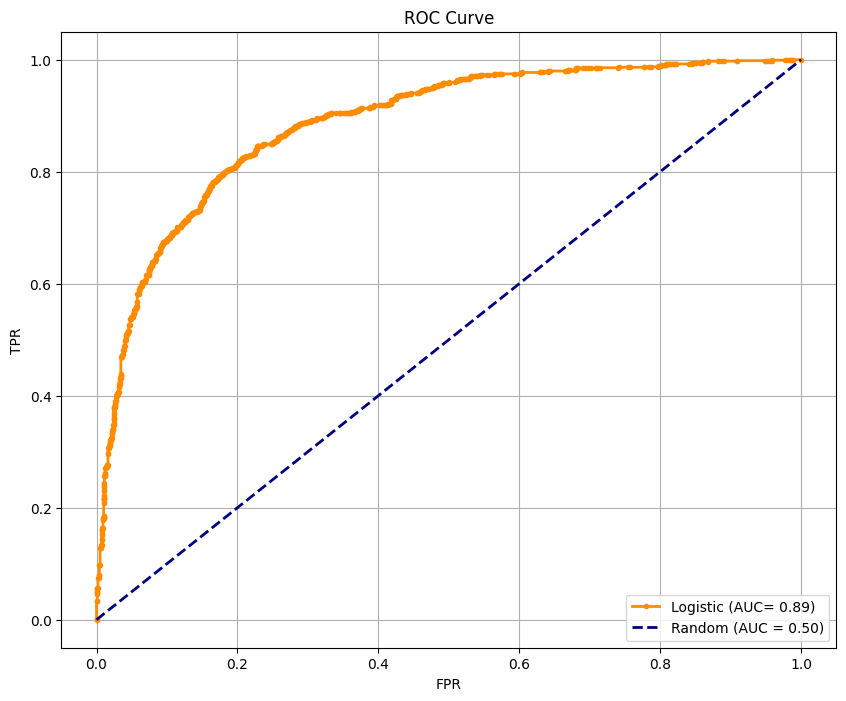

In [ ]:
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, marker='.',
         label=f'Logistic (AUC= {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random (AUC = 0.50)')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.**

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f'Значение ROC-AUC метрики: {roc_auc:.4f}')

Значение ROC-AUC метрики: 0.8860


**5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.**

In [ ]:
# Зададим функцию для расчёта метрик
def calculate_tpr_fpr(y_true, y_scores, threshold):
    # Бинаризуем предсказания по порогу
    y_pred = np.where(y_scores >= threshold, 1, 0)
    # Подсчет истинно положительных и ложно положительных
    TP = np.sum((y_pred== 1) & (y_true == 1))
    FN = np.sum((y_pred== 0) & (y_true == 1))
    FP = np.sum((y_pred== 1) & (y_true == 0))
    TN = np.sum((y_pred== 0) & (y_true == 0))
    # Расчет TPR и FPR
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)

    return TPR, FPR

In [ ]:
# Вычисление TPR и FPR для разных порогов
thresholds = np.linspace(0, 1, 100)
tpr_list = []
fpr_list = []

In [ ]:
# Расчет в цикле для каждого порога
for threshold in thresholds:
    tpr, fpr = calculate_tpr_fpr(y_test, y_pred, threshold)
    tpr_list.append(tpr)
    fpr_list.append(fpr)

In [ ]:
# Вычисление значения ROC-AUC метрики (ПУНКТ 8)
roc_auc_my = auc(fpr_list, tpr_list)
print(f'Значение ROC-AUC метрики: {roc_auc_my:.4f}')

Значение ROC-AUC метрики: 0.8861


**6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.**

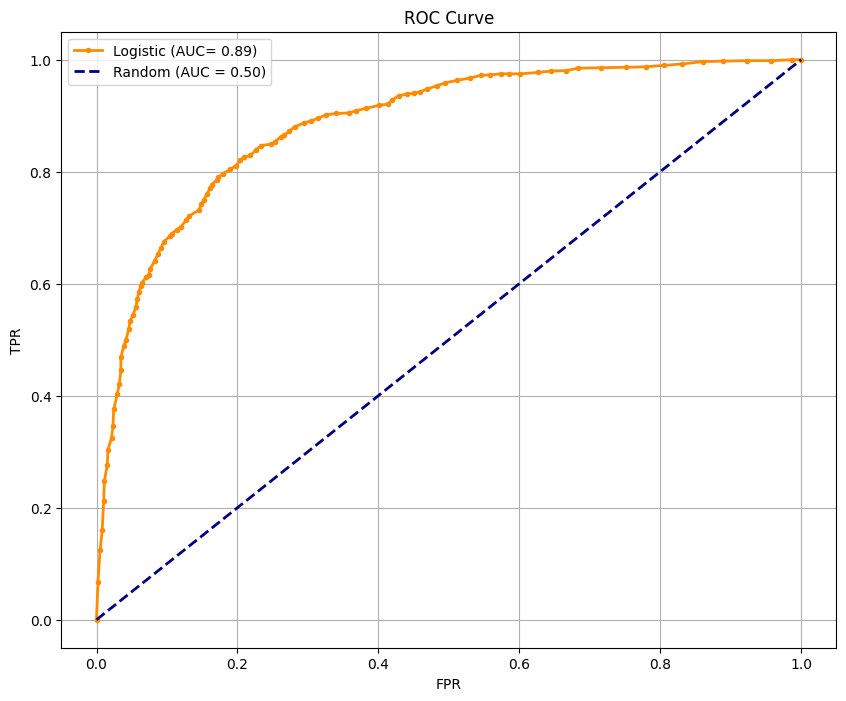

In [ ]:
# Построение ROC-кривой
plt.figure(figsize=(10, 8))
plt.plot(fpr_list, tpr_list, color='darkorange', lw=2, marker='.', label=f'Logistic (AUC= {roc_auc_my:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random (AUC = 0.50)')
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(True)
plt.legend()
plt.show()

Объединение двух графиков

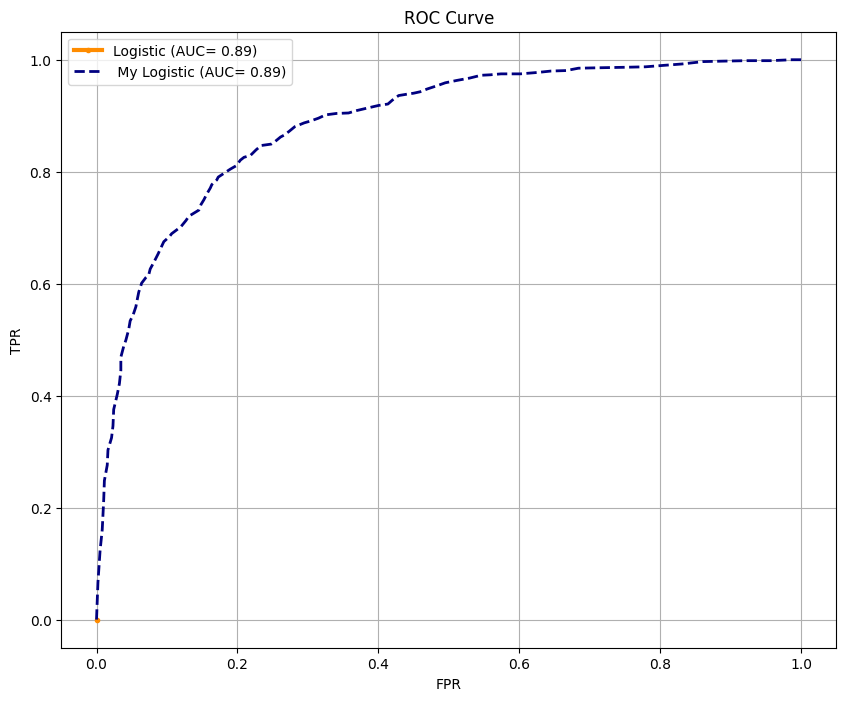

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=3, marker='.', label=f'Logistic (AUC= {roc_auc:.2f})')
plt.plot(fpr_list, tpr_list, color='navy', lw=2, linestyle='--', label=f' My Logistic (AUC= {roc_auc_my:.2f})')
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(True)
plt.legend()
plt.show()

Вывод: Графики проходят практически идентично. Т.к. использовалась одна и та же модель и одно и то же решение с разной реализацией, можем сделать вывод, что решение верное.

**7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.**

Доработаем функцию из пункта 5, чтобы она рассчитывала значения Precision и Recall

In [ ]:
def calculate_metrics(y_true, y_scores, threshold):
    y_pred = np.where(y_scores >= threshold, 1, 0)
    # Подсчет TP, FN, FP, TN
    TP = np.sum((y_pred == 1) & (y_true == 1))
    FN = np.sum((y_pred == 0) & (y_true == 1))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    TN = np.sum((y_pred == 0) & (y_true == 0))
    # Расчет TPR, FPR, Precision, и Recall
    TPR = TP / (TP + FN) if (TP + FN) else 0
    FPR = FP / (FP + TN) if (FP + TN) else 0
    Precision = TP / (TP + FP) if (TP + FP) else 0
    Recall = TPR  # TPR и Recall это одно и то же

    return TPR, FPR, Precision, Recall

In [ ]:
# Вычисление метрик для разных порогов
thresholds = np.linspace(0, 1, 100)
metrics = {'tpr': [], 'fpr': [], 'precision': [], 'recall': []}

In [ ]:
# Расчет в цикле для каждого порога
for threshold in thresholds:
    tpr, fpr, precision, recall = calculate_metrics(y_test, y_pred, threshold)
    metrics['tpr'].append(tpr)
    metrics['fpr'].append(fpr)
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)

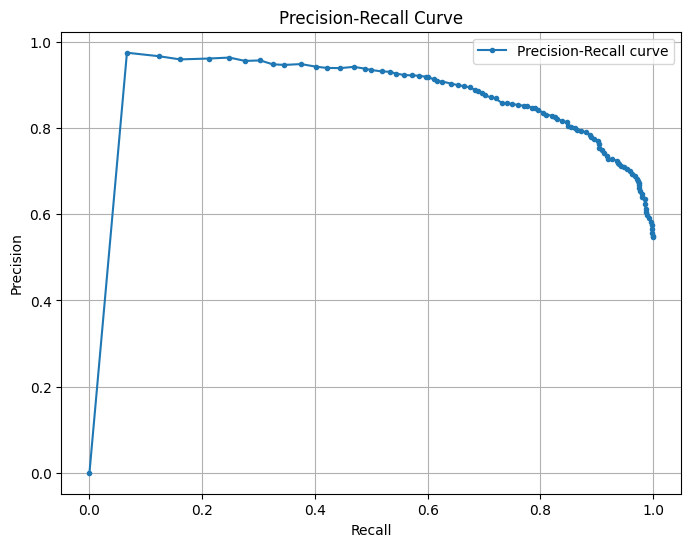

In [ ]:
# Построение Precision-Recall кривой
plt.figure(figsize=(8, 6))
plt.plot(metrics['recall'], metrics['precision'], marker='.', label='Precision-Recall curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.legend()

plt.show()

**9. Сформулируйте выводы по проделанной работе**

**a. Как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?**

По полученым графикам можно сделать вывод, что модель обучена хорошо. Для стандартного метода Значение ROC-AUC метрики: 0.8860, для ручного метода - 0.8861.

При сравнении двух графиков видно, что точки проходят практически идентично, что и логично, т.к. работали с одной и той же обученной моделью и одинаковыми методами, но в разной реализации.

**b. Может ли ROC-кривая проходить ниже диагонали?**

Да, в таком случае классификатор делает много ложноположительных предсказаний